<a href="https://colab.research.google.com/github/nervaljunior/AI-SolverNet-Deep-Learning-for-Dataset/blob/main/Untitled2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto de Coleta e Tratamento de Dados do Sensor ZMTP101B

O presente trabalho aborda a importância da coleta e tratamento de dados provenientes da captação de tensão do sensor ZMTP101B. O projeto está dividido em duas partes:

## Parte 1: Protocolo MQTT
Esta seção apresenta o protocolo MQTT, amplamente utilizado para a coleta de dados em indústrias. Aqui, exploramos os fundamentos do MQTT e sua relevância na captação eficiente de dados.

## Parte 2: Aplicação Prática
Na segunda parte, descrevemos uma aplicação real que utiliza o protocolo MQTT para coletar informações de um sensor de tensão conectado a uma Esp32. Os dados coletados são enviados para um servidor MQTT, onde são tratados para apresentação em formato gráfico. Essa abordagem torna a compreensão dos dados mais acessível, mesmo para pessoas não familiarizadas com programação.

---


## Protocolo MQTT e Calibração Estática

O sistema utilizará o protocolo MQTT para o envio dos dados obtidos pela ESP32, que contém o sensor ZMTP. Os dados serão salvos em um banco de dados, e através deles, será realizada a calibração estática.

Para a calibração estática, seguindo os princípios descritos por Lathi (2008) e Hart (2012), será utilizado o sensor ZMTP101B. A calibração incluirá a determinação do modelo matemático, incluindo a incerteza associada a essa calibração. Além disso, será feita a calibração entre dados do sensor ZMTP (Yrms), valores de tensão do multímetro (Xrms) e os parâmetros \(a\) e \(b\) da calibração estática.




# Calibração Inicial e Procedimento de Medição para o Módulo ZMPT101B

## Calibração Inicial

Para assegurar a precisão das medições realizadas pelo módulo ZMPT101B, é imperativo realizar uma calibração inicial. O potenciômetro embutido é utilizado para ajustar a amplificação do sinal. Em teoria, o sinal de 250VAC (RMS) deve ser reproduzido como um sinal que varia de 0 a 3,3V, centrado em torno de 1,65V.

O potenciômetro ZMPT101B desempenha um papel crucial nessa calibração, permitindo a configuração da amplificação do sinal de acordo com as características específicas do projeto. É essencial considerar as limitações do alcance do sinal para garantir medições precisas.

\[ V_{\text{saída max}} = \text{tensão de pico} \times \sqrt{2} \]

## Procedimento de Medição

O módulo ZMPT101B é conectado ao circuito conforme mostrado na Figura 2, e a medição é realizada em um ambiente controlado. No exemplo apresentado, a tensão de uma lâmpada incandescente conectada a um dimmer de luz baseado em Triac é medida. O usuário pode adaptar o procedimento para medir a tensão desejada, lembrando-se de não ultrapassar os 250VAC.

Após a conexão, a tensão máxima é aplicada ao circuito, e os resultados são registrados. Este procedimento permite verificar a capacidade do módulo ZMPT101B em fornecer medições precisas e adaptar-se a diferentes sinais.

O Sensor de Tensão AC ZMPT101B é uma ferramenta valiosa em projetos que envolvem medição de tensão alternada. Sua capacidade de adaptação a diferentes sinais, juntamente com a possibilidade de calibração, torna-o uma escolha eficiente para aplicações que exigem precisão nas medições.

O módulo ZMPT101B é capaz de adaptar o sinal para evitar danos à placa, o que é essencial para medições TrueRMS.

---

# Incerteza na Calibração de Sensores de Tensão

A incerteza associada ao processo de calibração é uma medida crítica que reflete a confiabilidade dos parâmetros de calibração obtidos. A equação de incerteza associada à calibração, no contexto da equação linear \(Y_{\text{sensor}} = a \cdot X_{\text{multímetro}} + b\), é expressa como:

\[ U(Y_{\text{sensor}}) = \left( \frac{\partial Y_{\text{sensor}}}{\partial a} \cdot U(a) \right)^2 + \left( \frac{\partial Y_{\text{sensor}}}{\partial b} \cdot U(b) \right)^2 + U_{\text{instrumento}}^2 \]

Onde:
- \( U(Y_{\text{sensor}}) \) é a incerteza associada à leitura do sensor.
- \( U(a) \) e \( U(b) \) são as incertezas associadas aos parâmetros \(a\) e \(b\), respectivamente.
- \( U_{\text{instrumento}} \) é a incerteza do instrumento de referência.

Essa equação considera as variações nos parâmetros \(a\) e \(b\) e a incerteza do instrumento de referência ao calcular a incerteza associada à leitura do sensor.

## Implementação Prática da Incerteza na Calibração

A implementação prática da avaliação da incerteza na calibração envolve o cálculo das derivadas parciais \(\frac{\partial Y_{\text{sensor}}}{\partial a}\) e \(\frac{\partial Y_{\text{sensor}}}{\partial b}\), juntamente com as incertezas associadas \(U(a)\), \(U(b)\) e \(U_{\text{instrumento}}\).

---

# Análise Estatística, Regressão e Avaliação do Erro e Incerteza

## Análise Estatística e Regressão

A análise estatística e aplicação de regressão são etapas cruciais para ajustar uma curva ou linha aos dados coletados. Essa curva representa a relação entre os valores do sensor e do multímetro em função dos diferentes níveis de pico. O ajuste da curva envolve a identificação dos parâmetros que minimizam o erro, seguindo uma abordagem semelhante à calibração estática mencionada anteriormente.

Abaixo está um exemplo de código para realizar a análise estatística e regressão:

```python
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

modelo_regressao = LinearRegression()
modelo_regressao.fit(X_multimetro.reshape(-1, 1), Y_sensor_calibrado)


previsoes = modelo_regressao.predict(X_multimetro.reshape(-1, 1))


erro_absoluto = np.abs(Y_sensor_calibrado - X_multimetro)


erro_relativo = np.abs((Y_sensor_calibrado - X_multimetro) / X_multimetro) * 100


plt.scatter(X_multimetro, Y_sensor_calibrado, label='Dados de Calibração')
plt.plot(X_multimetro, previsoes, color='red', label='Linha de Regressão')
plt.xlabel('Tensão do Multímetro')
plt.ylabel('Leitura do Sensor Calibrado')
plt.legend()
plt.show()


print(f"Erro Absoluto Médio: {np.mean(erro_absoluto)}")
print(f"Erro Relativo Médio: {np.mean(erro_relativo)}%")
```

## Avaliação do Erro e Incerteza

A avaliação do erro envolve o cálculo do erro absoluto e relativo para cada ponto de operação. Além disso, a incerteza associada ao processo de medição deve ser considerada, levando em conta a incerteza do sensor, do multímetro e outras fontes relevantes. Métodos estatísticos ou análise de propagação de incerteza podem ser utilizados para estimar a incerteza global nas medições.

Essas considerações são cruciais para garantir a confiabilidade e precisão do processo de calibração e medição.

# Variação do Valor de Pico e Análise de Erro e Incerteza

## Variação do Valor de Pico

Para realizar a análise da variação do erro e da incerteza em relação aos diferentes níveis de pico da grandeza medida, você pode repetir os passos anteriores para cada conjunto de dados correspondente a diferentes valores de pico. Abaixo, fornecerei um exemplo de como isso pode ser implementado em Python:

```python

conjuntos_dados_pico = [dados_pico1, dados_pico2, dados_pico3, ...]


for i, conjunto_dados in enumerate(conjuntos_dados_pico):

    X_multimetro = conjunto_dados['X_multimetro']
    Y_sensor_calibrado = conjunto_dados['Y_sensor_calibrado']


    plt.scatter(X_multimetro, Y_sensor_calibrado, label=f'Dados de Calibração - Pico {i + 1}')

plt.xlabel('Tensão do Multímetro')
plt.ylabel('Leitura do Sensor Calibrado')
plt.legend()
plt.show()
```

## Cálculo do Valor Eficaz (RMS)

Para calcular o valor eficaz (RMS) com base nos dados coletados, você pode utilizar a fórmula fornecida:

```python
def calcular_rms(valores):
    return np.sqrt(np.mean(valores**2))


valores_amostras = conjunto_dados['valores_amostras']


rms = calcular_rms(valores_amostras)
print(f"Valor Eficaz (RMS): {rms}")
```

Lembre-se de adaptar esses códigos conforme necessário com base na estrutura específica dos seus dados e requisitos.

In [41]:
import numpy as np
from scipy import stats
from scipy.stats import t
from scipy.stats import norm
import matplotlib.path as mpath
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

Erro Médio: 0.0000
Variância: 0.9130
Desvio Padrão: 0.9555
Intervalo de Confiança (95%): (-0.2743131317852419, 0.27431313178524847)
Teste t de Student para a inclinação (a): t = 1636.5677, p-value = 0.0000


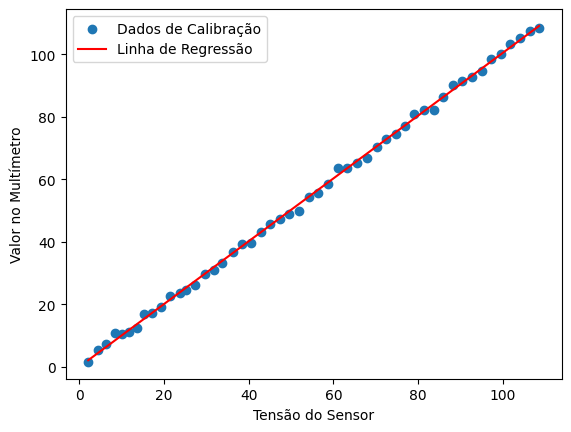

In [42]:
# Seus dados
tensao_sensor = np.array([2.1, 4.3, 6.2, 8.5, 10.1, 11.8, 13.7, 15.2, 17.1, 19.3,
                          21.5, 23.8, 25.1, 27.3, 29.6, 31.7, 33.8, 36.2, 38.4, 40.5,
                          42.8, 45.1, 47.3, 49.6, 51.9, 54.2, 56.4, 58.7, 61.0, 63.3,
                          65.7, 67.9, 70.2, 72.5, 74.7, 76.9, 79.1, 81.5, 83.7, 86.0,
                          88.3, 90.5, 92.7, 95.0, 97.3, 99.5, 101.8, 104.1, 106.4, 108.6])

valor_multimetro = tensao_sensor + np.random.normal(0, 1, len(tensao_sensor))



X = tensao_sensor.reshape(-1, 1)
y = valor_multimetro


modelo = LinearRegression()
modelo.fit(X, y)


previsoes = modelo.predict(X)


erro_medio = np.mean(previsoes - y)
variancia = np.var(previsoes - y)
desvio_padrao = np.std(previsoes - y)
intervalo_confianca = stats.t.interval(0.95, len(previsoes) - 1, loc=np.mean(previsoes - y), scale=stats.sem(previsoes - y))


coeficiente_inclinacao, intercept, r_value, p_value, std_err = stats.linregress(tensao_sensor, valor_multimetro)
t_teste_a = coeficiente_inclinacao / (std_err / np.sqrt(len(tensao_sensor)))


print(f"Erro Médio: {erro_medio:.4f}")
print(f"Variância: {variancia:.4f}")
print(f"Desvio Padrão: {desvio_padrao:.4f}")
print(f"Intervalo de Confiança (95%): {intervalo_confianca}")
print(f"Teste t de Student para a inclinação (a): t = {t_teste_a:.4f}, p-value = {p_value:.4f}")


plt.scatter(tensao_sensor, valor_multimetro, label='Dados de Calibração')
plt.plot(tensao_sensor, previsoes, color='red', label='Linha de Regressão')
plt.xlabel('Tensão do Sensor')
plt.ylabel('Valor no Multímetro')
plt.legend()
plt.show()


In [43]:
modelo = LinearRegression().fit(X, y)

a = modelo.coef_[0]
b = modelo.intercept_


Y_sensor = modelo.predict(X)

U_sensor = 0.1
U_multimetro = 0.2
U_instrumento = 0.3


dY_da = X
dY_db = np.ones_like(X)


U_Y_sensor = np.sqrt((dY_da * U_sensor)**2 + (dY_db * U_multimetro)**2 + U_instrumento**2)


X = tensao_sensor.reshape(-1, 1)
y = valor_multimetro


modelo = LinearRegression().fit(X, y)


Y_sensor = modelo.predict(X)


erro_absoluto = np.abs(Y_sensor - valor_multimetro)


erro_relativo = np.abs((Y_sensor - valor_multimetro) / valor_multimetro) * 100


U_erro_absoluto = np.sqrt(U_sensor**2 + U_multimetro**2)

print(f"Coeficiente 'a': {a:.4f}")
print(f"Coeficiente 'b': {b:.4f}")
print(f"Incerteza associada à calibração: {np.mean(U_Y_sensor):.4f}")
print(f"Erro Absoluto Médio: {np.mean(erro_absoluto):.4f}")
print(f"Erro Relativo Médio: {np.mean(erro_relativo):.4f}%")
print(f"Incerteza do Sensor: {U_sensor}")
print(f"Incerteza do Multímetro: {U_multimetro}")
print(f"Incerteza do instrumento: {U_instrumento}")
print(f"Incerteza na Propagação para Erro Absoluto: {np.mean(U_erro_absoluto):.4f}")

Coeficiente 'a': 1.0049
Coeficiente 'b': -0.0396
Incerteza associada à calibração: 5.4034
Erro Absoluto Médio: 0.7536
Erro Relativo Médio: 3.5526%
Incerteza do Sensor: 0.1
Incerteza do Multímetro: 0.2
Incerteza do instrumento: 0.3
Incerteza na Propagação para Erro Absoluto: 0.2236


## Intervalo de Confiança e Probabilidade Associada

O quadro abaixo ilustra a relação entre intervalos da variável, fatores de confiança (\(\alpha\)), e a probabilidade de encontrar as medidas dentro desses intervalos:

| Intervalo      | Fator de Confiança (\(\alpha\)) | Probabilidade  |
| -------------- | ------------------------------- | --------------- |
| \([-σ, +σ]\)   | \(\alpha = 0,683\)               | \(68,3\%\)      |
| \([-2σ, +2σ]\) | \(\alpha = 0,954\)               | \(95,4\%\)      |
| \([-3σ, +3σ]\) | \(\alpha = 0,997\)               | \(99,7\%\)      |

Assim, praticamente todas as flutuações aleatórias dos valores medidos se situam na faixa de \(\{x ± 3σ\}\), representando um fator de confiança (\(\alpha\)) de \(0,997\). Em termos práticos, isso significa que apenas 3 em cada 1000 medidas podem estar fora dessa faixa. Geralmente, medidas além desse limite são consideradas mais do que erros aleatórios, sendo tratadas como enganos.

---


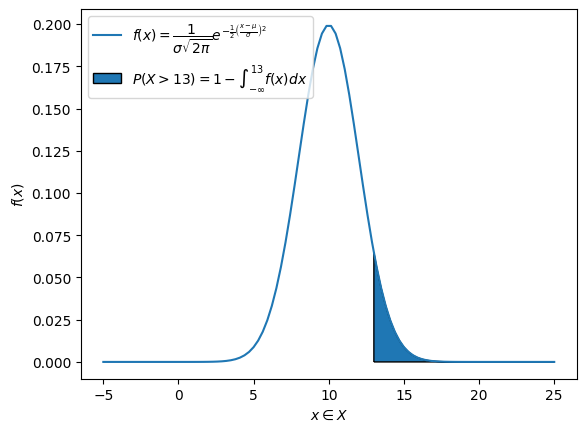

In [44]:
mu = 10
sigma = 2
x = 13
x_pdf = np.linspace(-5,25,100)
X_g13_patch = np.linspace(13,25,100)

normal_pdf = norm.pdf(x_pdf,loc=mu,scale=sigma)
normal_pdf_X_g13_patch = norm.pdf(X_g13_patch,loc=mu,scale=sigma)

fig,ax=plt.subplots()
ax.plot(x_pdf,normal_pdf,label=r'$f(x)=\dfrac{1}{\sigma\sqrt{2\pi}}e^{-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^{2}}$')
x_verts = np.concatenate(([13],X_g13_patch,[25,13]))
y_verts = np.concatenate(([0],normal_pdf_X_g13_patch,[0,0]))
verts = np.transpose(np.matrix([x_verts,y_verts]))
path = mpath.Path(verts)
pathpatch = mpatches.PathPatch(path,label=r'$P(X>13)=1-\int_{-\infty}^{13}{f(x)dx}$')
ax.add_patch(pathpatch)
ax.set_xlabel(r'$x\in{}X$')
ax.set_ylabel(r'$f(x)$')
ax.legend(loc=2)

plt.show()

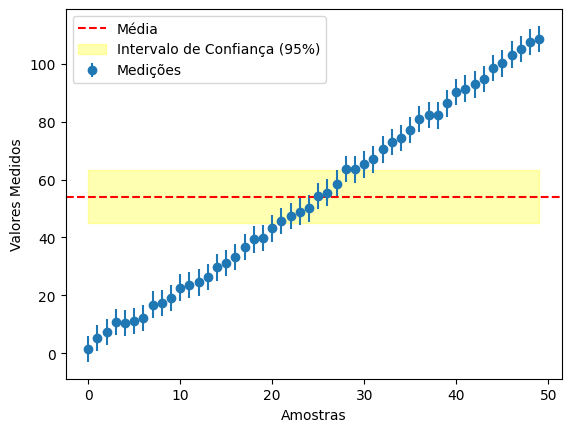

In [45]:
def calculate_uncertainty_type_a(values):
    mean = np.mean(values)
    standard_deviation = np.std(values, ddof=1)
    uncertainty_type_a = standard_deviation / np.sqrt(len(values))
    return uncertainty_type_a

def calculate_combined_uncertainty(uncertainty_type_a, uncertainty_type_b):
    combined_uncertainty = np.sqrt(uncertainty_type_a**2 + uncertainty_type_b**2)
    return combined_uncertainty

def calculate_expanded_uncertainty(combined_uncertainty, coverage_factor):
    expanded_uncertainty = combined_uncertainty * coverage_factor
    return expanded_uncertainty

def calculate_tolerance_interval(mean, expanded_uncertainty):
    lower_bound = mean - expanded_uncertainty
    upper_bound = mean + expanded_uncertainty
    return lower_bound, upper_bound


# Análise estatística
mean_measurement = np.mean(valor_multimetro)
uncertainty_type_a = calculate_uncertainty_type_a(valor_multimetro)
uncertainty_type_b = 0.1
combined_uncertainty = calculate_combined_uncertainty(uncertainty_type_a, uncertainty_type_b)

degrees_of_freedom = len(valor_multimetro) - 1
coverage_factor = t.ppf(0.975, degrees_of_freedom)

expanded_uncertainty = calculate_expanded_uncertainty(combined_uncertainty, coverage_factor)
lower_bound, upper_bound = calculate_tolerance_interval(mean_measurement, expanded_uncertainty)

# Plotagem
plt.errorbar(np.arange(len(valor_multimetro)), valor_multimetro, yerr=uncertainty_type_a, fmt='o', label='Medições')
plt.axhline(y=mean_measurement, color='r', linestyle='--', label='Média')
plt.fill_between(np.arange(len(valor_multimetro)), lower_bound, upper_bound, color='yellow', alpha=0.3, label='Intervalo de Confiança (95%)')
plt.xlabel('Amostras')
plt.ylabel('Valores Medidos')
plt.legend()
plt.show()



## Referências

- Oliveira, A. (2017). Título do Artigo. Nome da Revista, Volume(Issue), Páginas.
- Deckmann, S. M., & Pomilio, J. A. (2017). Título do Livro. Editora.
- Hart, C. (2012). Título do Livro. Editora.
- Lathi, B. P. (2008). Título do Livro. Editora.